# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

In [1]:

import tensorflow_probability.substrates.jax as tfp
from jax import random

tfpd = tfp.distributions

In [2]:

from jaxns import Prior, Model


def log_likelihood(theta):
    return 0.


def prior_model():
    x = yield Prior(tfpd.Uniform(0., 1.), name='x')
    return x


model = Model(prior_model=prior_model,
              log_likelihood=log_likelihood)

log_Z_true = 0.
print(f"True log(Z)={log_Z_true}")


/home/albert/miniconda3/envs/jaxns_py/lib/python3.11/site-packages/jaxns/internals/mixed_precision.py:15: UserWarning: JAX x64 is not enabled. Setting it now. Check for errors.
  warnings.warn("JAX x64 is not enabled. Setting it now. Check for errors.")
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


True log(Z)=0.0


In [3]:
from jaxns import NestedSampler

# Create the nested sampler class. In this case without any tuning.
exact_ns = NestedSampler(model=model, max_samples=1e4)

termination_reason, state = exact_ns(random.PRNGKey(42))
results = exact_ns.to_results(termination_reason=termination_reason, state=state)


/home/albert/miniconda3/envs/jaxns_py/lib/python3.11/site-packages/jaxns/internals/mixed_precision.py:61: UserWarning: Expected integer type, got bool, at public.py:173 in to_results -> sharded_static.py:475 in _to_results -> mixed_precision.py:105 in cast_to_count -> mixed_precision.py:67 in _cast_integer_to -> tree.py:61 in map -> tree_util.py:321 in tree_map -> tree_util.py:321 in <genexpr> -> mixed_precision.py:61 in conditional_cast.
  warnings.warn(f"Expected integer type, got {x.dtype}, {get_grandparent_info()}.")


In [4]:
# We can use the summary utility to display results
exact_ns.summary(results)

--------
Termination Conditions:
All live-points are on a single plateau (potential numerical errors, consider 64-bit)
--------
likelihood evals: 30
samples: 45
phantom samples: 0
likelihood evals / sample: 0.7
phantom fraction (%): 0.0%
--------
logZ=-0.034 +- 0.023
max(logL)=0.0
H=-0.03
ESS=20
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.51 +- 0.3 | 0.13 / 0.47 / 0.96 | 0.5 | 0.5
--------


/home/albert/miniconda3/envs/jaxns_py/lib/python3.11/site-packages/jaxns/plotting.py:48: UserWarning: Found samples with zero likelihood evaluations.
  warnings.warn("Found samples with zero likelihood evaluations.")
/home/albert/miniconda3/envs/jaxns_py/lib/python3.11/site-packages/jaxns/plotting.py:52: RuntimeWarning: divide by zero encountered in divide
  1. / num_likelihood_evaluations_per_sample


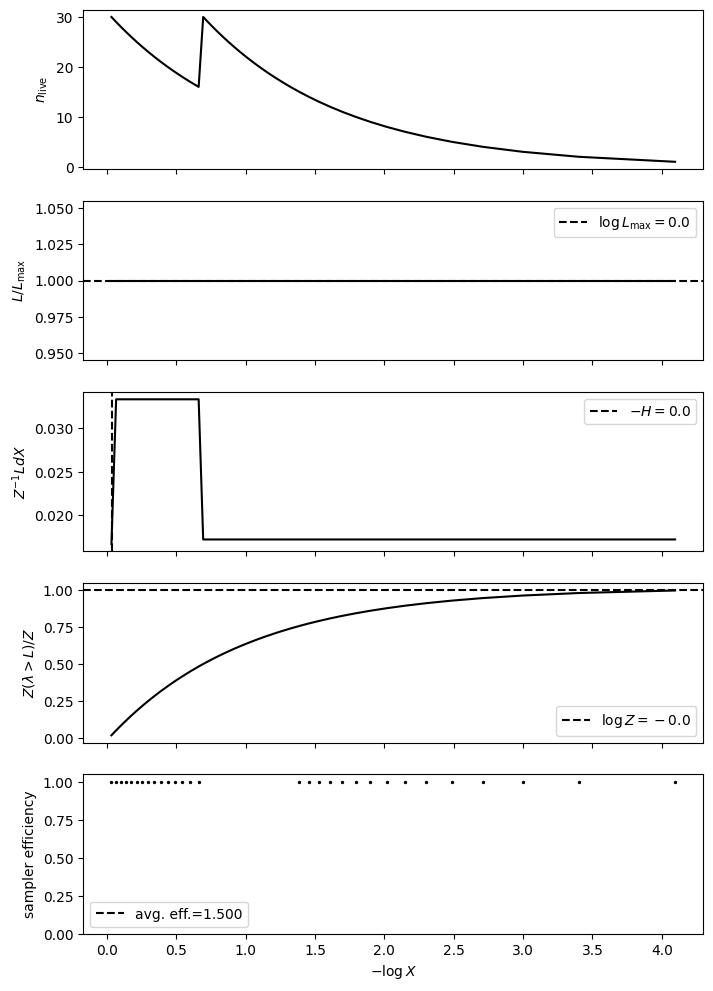

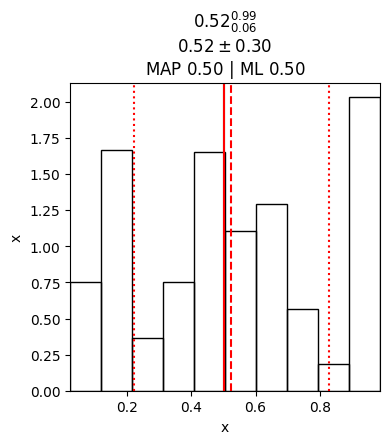

In [5]:
# We plot useful diagnostics and a distribution cornerplot
exact_ns.plot_diagnostics(results)
exact_ns.plot_cornerplot(results)